# Stock Market Predictor

## Data Preprocessing

#### Importing Dependencies

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

#### Importing the datasets


In [32]:
#loading the datasets
nifty = pd.read_csv('NIFTY.csv')
currency = pd.read_csv('INR=X.csv')
stockdata = pd.read_csv('RELIANCE.NS.csv')

#dropping unnecessary data
stockdata.drop(["Adj Close", "High", "Low"], axis = 1, inplace = True)
nifty.drop(["Date", "Open","Adj Close", "High", "Low","Volume"], axis = 1, inplace = True)
currency.drop(["Date", "Open","Adj Close", "High", "Low","Volume"], axis = 1, inplace = True)

#renaming columns
nifty.rename(columns = {'Close':'NifClose'}, inplace = True)
currency.rename(columns = {'Close':'CurClose'}, inplace = True)

#joining datasets
stockdata = stockdata.join(nifty)
stockdata = stockdata.join(currency)

#reshuffling columns
stockdata = stockdata[['Date','NifClose','CurClose','Open','Volume','Close']]

#converting to dat-time format
stockdata['Date'] = pd.to_datetime(stockdata['Date'])

#filling missing values
stockdata = stockdata.fillna(method ='pad')
count = stockdata.isnull().sum()

#saving the csv file
stockdata.to_csv('final.csv')


X = stockdata.iloc[:, 2:-1].values
y = stockdata.iloc[:, -1].values



          NifClose  CurClose      Open    Volume     Close
NifClose  1.000000  0.825313  0.927163  0.103716  0.927612
CurClose  0.825313  1.000000  0.814126  0.288923  0.813891
Open      0.927163  0.814126  1.000000  0.239821  0.999556
Volume    0.103716  0.288923  0.239821  1.000000  0.242357
Close     0.927612  0.813891  0.999556  0.242357  1.000000


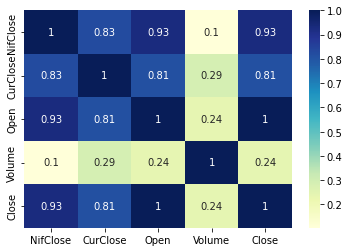

In [11]:
print(stockdata.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(stockdata.corr(), cmap="YlGnBu", annot=True)

In [34]:


Q1 = np.percentile(stockdata['Volume'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(stockdata['Volume'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", stockdata.shape)
 
# Upper bound
upper = np.where(stockdata['Volume'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(stockdata['Volume'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
stockdata.drop(upper[0], inplace = True)
stockdata.drop(lower[0], inplace = True)
 
print("New Shape: ", stockdata.shape)

Old Shape:  (2281, 6)


C:\Users\s540\AppData\Local\Temp\ipykernel_26404\441172669.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(stockdata['Volume'], 25,
C:\Users\s540\AppData\Local\Temp\ipykernel_26404\441172669.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(stockdata['Volume'], 75,


KeyError: '[1239, 1951, 1956, 1981, 1983, 1987, 1988, 1991, 1992, 2011] not found in axis'

C:\Users\s540\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Volume'>

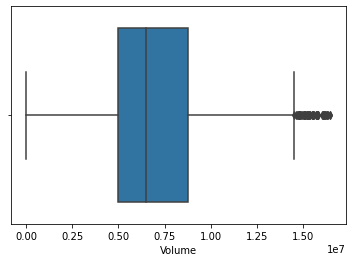

In [30]:
sb.boxplot(stockdata['Volume'])
# IQR

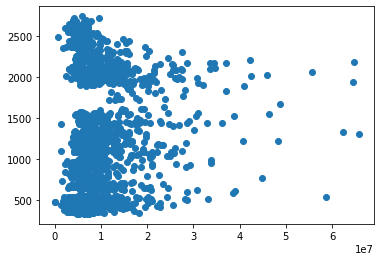

In [9]:
plt.scatter(stockdata['Volume'],stockdata['Open'])

#### Looking at the Data briefly

In [13]:

stockdata.info()
stockdata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2469 non-null   datetime64[ns]
 1   NifClose  2469 non-null   float64       
 2   CurClose  2469 non-null   float64       
 3   Open      2469 non-null   float64       
 4   Volume    2469 non-null   float64       
 5   Close     2469 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 115.9 KB


,NifClose,CurClose,Open,Volume,Close
count,2469.000000,2469.000000,2469.000000,2.469000e+03,2469.000000
mean,9741.677645,65.861045,985.185924,8.568893e+06,984.425674
std,3260.070355,6.112106,667.160579,6.163739e+06,666.411332
min,4835.649902,51.467999,334.330872,0.000000e+00,334.875702
25%,7640.450195,61.959999,449.241638,5.127612e+06,449.167328
50%,9039.250000,66.319000,657.022095,6.821782e+06,656.155273
75%,11319.549805,71.035004,1337.472046,9.676173e+06,1331.132202
max,18477.050781,77.570000,2742.750000,6.584835e+07,2731.850098


#### Splitting the Dataset

In [14]:
splitRatio = 0.8 # 80% --> training data; 20% --> testing data
X_train = X[:int(X.shape[0]*splitRatio)]
X_test = X[int(X.shape[0]*splitRatio):]
y_train = y[:int(X.shape[0]*splitRatio)]
y_test = y[int(X.shape[0]*splitRatio):]

#### Feature Scaling 

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 1:] = sc.fit_transform(X_train[:, 1:])
X_test[:, 1:] = sc.transform(X_test[:, 1:])

## Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [17]:
#saving the data for comparison
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[1361.44 1358.03]
 [1358.35 1403.69]
 [1425.83 1416.32]
 [1445.62 1414.74]
 [1432.4  1413.55]
 [1448.09 1452.23]
 [1430.75 1421.72]
 [1442.56 1446.93]
 [1451.85 1447.03]
 [1444.87 1492.8 ]
 [1540.52 1547.13]
 [1571.63 1561.99]
 [1563.33 1465.36]
 [1533.47 1496.45]
 [1472.27 1435.95]
 [1449.94 1459.4 ]
 [1475.97 1440.75]
 [1458.94 1408.9 ]
 [1414.7  1433.7 ]
 [1436.38 1441.25]
 [1452.85 1431.55]
 [1448.28 1424.05]
 [1431.69 1445.55]
 [1456.48 1472.25]
 [1469.41 1464.4 ]
 [1481.35 1520.35]
 [1523.63 1535.7 ]
 [1543.21 1541.65]
 [1543.97 1579.8 ]
 [1594.56 1581.7 ]
 [1617.54 1569.5 ]
 [1558.55 1537.15]
 [1540.67 1572.15]
 [1563.14 1537.7 ]
 [1501.01 1588.8 ]
 [1568.67 1614.55]
 [1645.99 1617.7 ]
 [1609.5  1615.35]
 [1607.99 1655.9 ]
 [1683.8  1759.4 ]
 [1777.71 1746.15]
 [1749.96 1720.9 ]
 [1738.64 1727.85]
 [1727.38 1717.9 ]
 [1727.42 1741.65]
 [1725.61 1723.15]
 [1735.46 1704.1 ]
 [1718.16 1737.6 ]
 [1741.14 1760.35]
 [1777.93 1787.9 ]
 [1806.55 1851.8 ]
 [1858.98 1823.45]
 [1821.37 17

#### Assessing the Metrics of the model

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
# Printout relevant metrics
print("Model Coefficients:", lm.coef_)
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_pred, y_test)))
print("R2 Score:",r2_score(y_pred, y_test))

Model Coefficients: [1.97e-02 3.45e+02 2.06e+00]
Root Mean Squared Error: 36.281792920498525
R2 Score: 0.9841719189652051


Text(0, 0.5, 'Predicted Values')

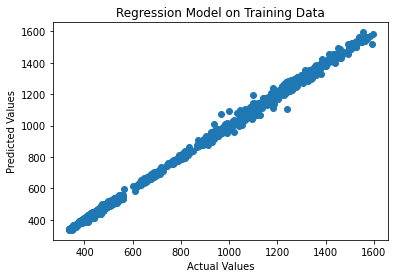

In [19]:
#plotting the results
plt.scatter(lm.predict(X_train),y_train)
plt.title('Regression Model on Training Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0, 0.5, 'Predicted Values')

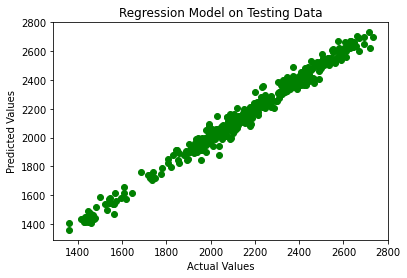

In [20]:
#plotting the results
plt.scatter(y_pred,y_test, color ='green')
plt.title('Regression Model on Testing Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')